Instantiate the LUT

In [23]:
from paramExtract import gmidLUT
import matplotlib.pyplot as mp
nfet = gmidLUT('nfet.csv', 'nfet')

Plot a standard Id vs Vds curve across a couple Vgs's for a length of 1um to show square law relation. Out of Vsb, Vds, Vgs, and L, the input array must fix three.

1


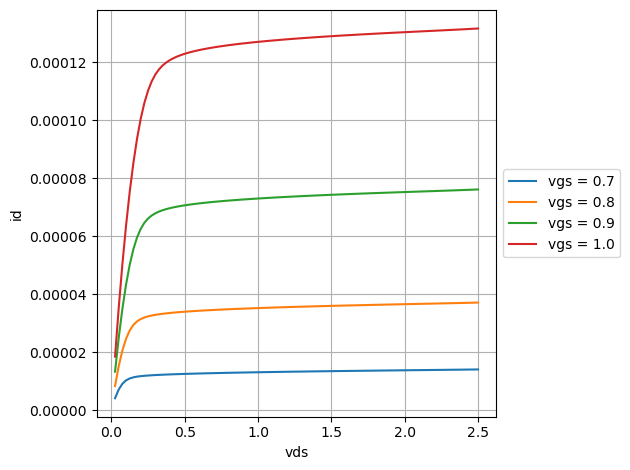

In [21]:
inar=['vsb', 0, 'vgs', [0.7, 0.8, 0.9, 1.0], 'L', 1e-6]
nfet.waveVsWave(inar, 'id', 'vds')

You can zoom in on the graph or you can find the corresponding X vs Y for a given array

In [29]:
inar=['vsb', 0, 'vgs', 0.9, 'L', 1e-6]
nfet.find_corresp(inar, 'vds', 1, 'id')

7.30644e-05

Two ways of plotting Jd (Id/W) vs gm/Id. Change the matplotlib inline to widget or qt for a pop-up that can be easily manipulated.

1


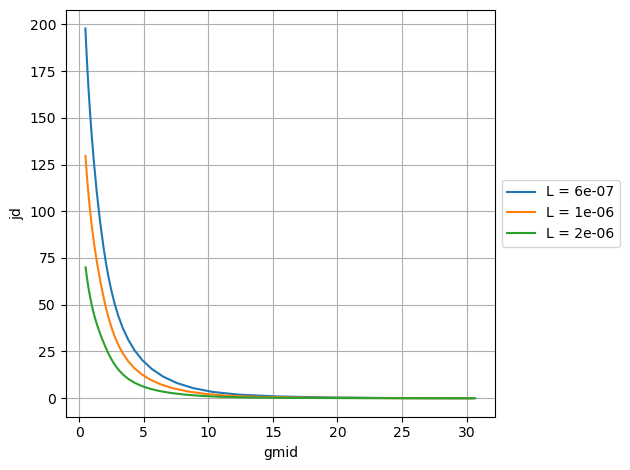

1


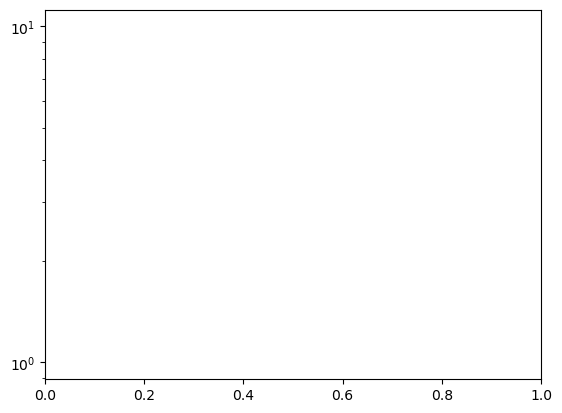

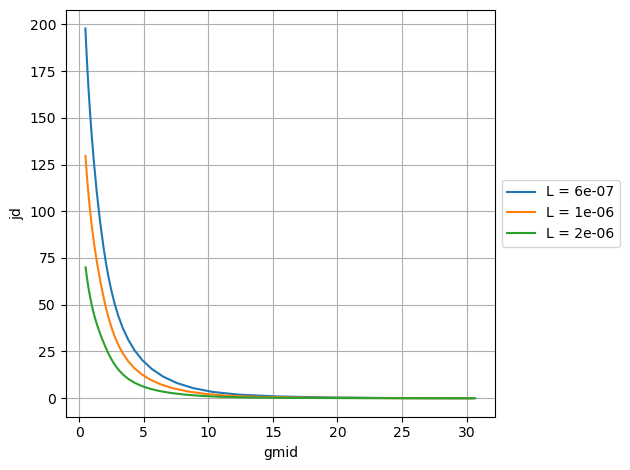

In [18]:
vsb = 500e-3
vds = 700e-3
L = [500e-9, 1e-6, 2e-6]
%matplotlib inline
nfet.plot_jd(vsb, vds, L)
nfet.waveVsWave(['vsb', vsb, 'vds', vds, 'L', L], 'jd', 'gmid')

The LUT was generated with discrete values, but can be interpolated for one axis. The following retrieves the data as numpy arrays instead of plotting them, and then calculating a weighted sum. In this example, gm/Id and Jd are interpolated between lengths of 500nm and 3um at 1.25um.

The print_unique function prints all the discrete values used to generate the LUT for a particular parameter which is needed for interpolation.

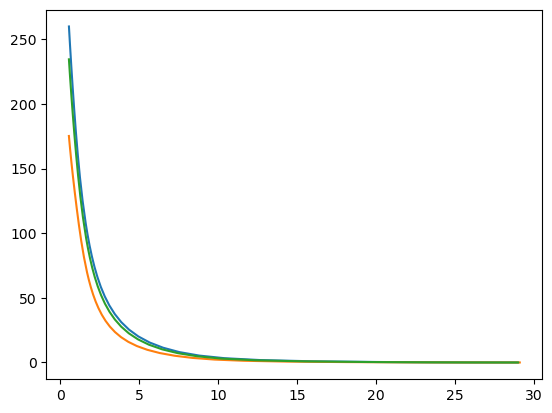

In [28]:
inar=['vsb', 0, 'vds', 1, 'L', 5e-7]
[gmid1, jd1]=nfet.wavefilterNP(inar, 'gmid', 'jd')
inar=['vsb', 0, 'vds', 1, 'L', 1e-6]
[gmid2, jd2]=nfet.wavefilterNP(inar, 'gmid', 'jd')
gmid3 = nfet.interpolate(5e-7, 3e-6, 1.25e-6, gmid1, gmid2)
jd3 = nfet.interpolate(5e-7, 3e-6, 1.25e-6, jd1, jd2)
fig, ax = mp.subplots()
mp.plot(jd1,gmid1)
mp.plot(jd2,gmid2)
mp.plot(jd3,gmid3)
mp.show()